In many scenarios, either in simulations or when working with real-world data, it may be necessary to use concepts from geometry when programming. In the following, we are going to have a look at some possible scenarios, and in the second hal of the notebook, we are going to add geometries to maps created from several input formats.

# Points, polygons and lines

Perhaps the most common Python library for dealing with shapes is called `shapely`. It has several classes that can handle points, lines and polygons. Let's import them!

In [1]:
from shapely.geometry import Point, Polygon

Let us define a point! We create an object of the `Point()` class, that can be in 2 or 3 dimensions.

In [2]:
p = Point([0,0])

We can create polygons by giving a list of coordinates to the constructor of the `Polygon()` class. We don't have to duplicate the first coordinate in the last element, but then our polygon won't be closed.

In [3]:
square = Polygon([[-1,-1],[-1,1],[1,1],[1,-1]])

In [4]:
square.is_closed

False

In a Jupyter notebook, we can easily display our shapes.

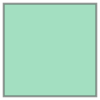

In [5]:
square

Let's write a function that creates regular polygons!

In [6]:
import numpy as np

In [7]:
def regular(n,R=1.5):
    t = np.linspace(0,2*np.pi,n+1)
    return Polygon([[R*np.cos(elem),R*np.sin(elem)] for elem in t])

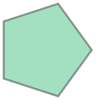

In [8]:
fivefold = regular(5)
fivefold

Let's make some simple operations with our polygons:

In [9]:
fivefold.area

5.349692904160239

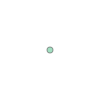

In [10]:
fivefold.centroid

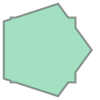

In [11]:
fivefold.union(square)

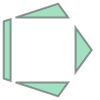

In [12]:
fivefold.difference(square)

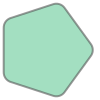

In [13]:
fivefold.buffer(0.4)

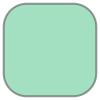

In [14]:
square.buffer(1)

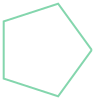

In [15]:
fivefold.boundary

In [16]:
fivefold.boundary.geom_type

'LineString'

# Simple maps


If we do the data analysis in Python, then it would be convenient to put our data on a map in Python, too. There are some libraries that enable the usage of the powerful and lightweight Leaflet.js library in Python. In the following cells, we are going to have a look at some basic functionalities of these maps in Folium. You may use another library as you choose.

In [17]:
import folium

Let's display the inner city of Budapest in a Jupyter Notebook!

In [18]:
folium.Map(location=[47.5,19.05],zoom_start=13)

The map used the tiles of the openstreetmap.org freely available database. There are many other options depending on our aims, see https://deparkes.co.uk/2016/06/10/folium-map-tiles/. A rather artistic approach for example is:

In [19]:
folium.Map(location=[47.5,19.05],zoom_start=13,tiles='stamenwatercolor')

Let's stick to a more scientific version, and let's add some useful objects to our map!

In [20]:
mymap = folium.Map(location=[47.5,19.05],zoom_start=13,tiles='cartodbpositron')
marker = folium.Marker(location=[47.47,19.06],popup='ELTE')
marker.add_to(mymap)
mymap

In [21]:
mymap = folium.Map(location=[47.5,19.05],zoom_start=13,tiles='cartodbpositron')
marker = folium.Marker(location=[47.47,19.06],popup='ELTE')
mymap.add_child(marker)

Which coordinate reference system does our map use? https://epsg.io/3857

In [22]:
mymap.crs

'EPSG3857'

In [23]:
mymap.fit_bounds(mymap.get_bounds())
mymap

## Geopandas

The ultimate tool to read almost any kind of geographical data is geopandas.

In [24]:
import geopandas as gpd

We are going to try out some simple operations on Hungarian county and highway data. You can download the county dataset from here: https://data2.openstreetmap.hu/hatarok/index.php?admin=6. It contains so-called shapefiles that store the geometric information and the metadata as well. The `.shp` file can be opened in geopandas as follows:

In [25]:
megyek = gpd.read_file('shapes/admin6.shp')
megyek.head()

,NAME,ADMIN_LEVE,geometry
0,Borsod-Abaúj-Zemplén megye,6,"POLYGON ((2232168.06 6134802.91, 2232283.74 61..."
1,Szabolcs-Szatmár-Bereg megye,6,"POLYGON ((2346476.67 6107200.5, 2346481.62 610..."
2,Vas megye,6,"POLYGON ((1793789.66 5920727.33, 1793969.03 59..."
3,Baranya megye,6,"POLYGON ((1962014.01 5778448.35, 1962316.68 57..."
4,Zala megye,6,"POLYGON ((1821480.85 5906302.74, 1821599.06 59..."


The geometry column contains the already known shapely `Polygon` class objects! Let's check Borsod-Abaúj-Zemplén:

In [26]:
megyek.NAME[9]

'Bács-Kiskun megye'

In [27]:
baz = megyek['geometry'][0]
baz = megyek['geometry'][0]

Which coordinate system did this shapefile use? http://geopandas.org/projections.html

In [28]:
megyek.crs

{'init': 'epsg:3785'}

Which county has the biggest area?

In [29]:
megyek['NAME'][megyek.area.idxmax]

'Bács-Kiskun megye'

Let us create a list of neighboring counties.

First, we 'inflate' our polygons.

In [30]:
from copy import deepcopy

In [31]:
big_megyek = deepcopy(megyek)
big_megyek['geometry'] = big_megyek['geometry'].buffer(10)
big_megyek2 = deepcopy(big_megyek)

In [32]:
big_megyek2

,NAME,ADMIN_LEVE,geometry
0,Borsod-Abaúj-Zemplén megye,6,"POLYGON ((2232163.204731585 6134794.167782397,..."
1,Szabolcs-Szatmár-Bereg megye,6,"POLYGON ((2346476.289600134 6107190.507237822,..."
2,Vas megye,6,"POLYGON ((1793781.470820561 5920721.590893787,..."
3,Baranya megye,6,"POLYGON ((1962007.055064964 5778441.164676162,..."
4,Zala megye,6,"POLYGON ((1821470.855893724 5906302.396722054,..."
5,Somogy megye,6,"POLYGON ((1878534.349012805 5830688.458270654,..."
6,Győr-Moson-Sopron megye,6,"POLYGON ((1828027.585169934 6051349.738853918,..."
7,Veszprém megye,6,"POLYGON ((1900609.773190642 5950389.797408121,..."
8,Tolna megye,6,"POLYGON ((2003937.07760524 5844761.460919693, ..."
9,Bács-Kiskun megye,6,"POLYGON ((2085347.46568889 5787630.697386785, ..."


In [33]:
neighbors = gpd.sjoin(big_megyek,big_megyek2,how ='left',op='intersects')[['NAME_left','NAME_right']]

In [34]:
neighbors.head(9)

,NAME_left,NAME_right
0,Borsod-Abaúj-Zemplén megye,Nógrád megye
0,Borsod-Abaúj-Zemplén megye,Heves megye
0,Borsod-Abaúj-Zemplén megye,Jász-Nagykun-Szolnok megye
0,Borsod-Abaúj-Zemplén megye,Borsod-Abaúj-Zemplén megye
0,Borsod-Abaúj-Zemplén megye,Hajdú-Bihar megye
0,Borsod-Abaúj-Zemplén megye,Szabolcs-Szatmár-Bereg megye
1,Szabolcs-Szatmár-Bereg megye,Borsod-Abaúj-Zemplén megye
1,Szabolcs-Szatmár-Bereg megye,Hajdú-Bihar megye
1,Szabolcs-Szatmár-Bereg megye,Szabolcs-Szatmár-Bereg megye


## Reprojecting and quick plotting geopandas data

In [35]:
%matplotlib inline

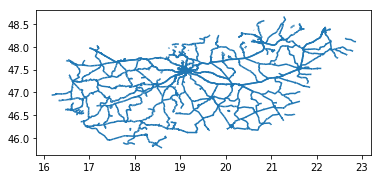

In [36]:
railways = gpd.read_file('shapes/gis.osm_railways_free_1.shp')
railways.plot()

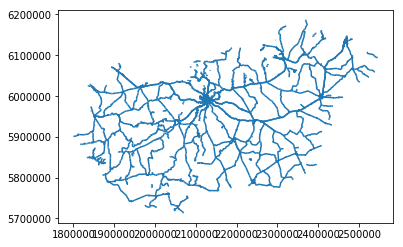

In [37]:
railways.to_crs({'init': 'epsg:3395'},inplace=True)
railways.plot()

## How long railways do Hungarian counties have?

We should reproject the county dataset to match the projection of the railway dataset.

In [38]:
megyek.to_crs({'init': 'epsg:3395'},inplace=True)

Sometimes it is useful to speed up spatial operations using a spatial index. Here is a good introduction into R-trees in geopandas.

http://geoffboeing.com/2016/10/r-tree-spatial-index-python/

Creating an R-tree index:

In [39]:
si = railways.sindex

In [40]:
type(si)

geopandas.sindex.SpatialIndex

In [41]:
megyek.head()

,NAME,ADMIN_LEVE,geometry
0,Borsod-Abaúj-Zemplén megye,6,"POLYGON ((2232168.06 6102949.35780532, 2232283..."
1,Szabolcs-Szatmár-Bereg megye,6,"POLYGON ((2346476.669999999 6075429.715303235,..."
2,Vas megye,6,"POLYGON ((1793789.66 5889529.746497965, 179396..."
3,Baranya megye,6,"POLYGON ((1962014.01 5747704.839290083, 196231..."
4,Zala megye,6,"POLYGON ((1821480.85 5875150.526615969, 182159..."


In [42]:
si = railways.sindex

megyek['possible_matches'] = megyek['geometry'].map(lambda g: list(si.intersection(g.bounds)))

def filter_railways(indices, polygon):
    sdf = railways.iloc[indices]
    return list(sdf[sdf.intersects(polygon)].index)

Trying out the concept.

In [43]:
megyek

,NAME,ADMIN_LEVE,geometry,possible_matches
0,Borsod-Abaúj-Zemplén megye,6,"POLYGON ((2232168.06 6102949.35780532, 2232283...","[13070, 5934, 5937, 5935, 5936, 5161, 13069, 5..."
1,Szabolcs-Szatmár-Bereg megye,6,"POLYGON ((2346476.669999999 6075429.715303235,...","[13070, 5934, 5937, 5935, 5936, 5161, 13069, 5..."
2,Vas megye,6,"POLYGON ((1793789.66 5889529.746497965, 179396...","[7156, 7157, 5069, 7151, 7158, 14302, 6664, 14..."
3,Baranya megye,6,"POLYGON ((1962014.01 5747704.839290083, 196231...","[4079, 4075, 6982, 6984, 6983, 942, 10380, 103..."
4,Zala megye,6,"POLYGON ((1821480.85 5875150.526615969, 182159...","[13123, 13122, 90, 4698, 13120, 13124, 4700, 1..."
5,Somogy megye,6,"POLYGON ((1878544.01 5799779.099548763, 187857...","[6977, 6978, 896, 6965, 6963, 895, 7756, 6961,..."
6,Győr-Moson-Sopron megye,6,"POLYGON ((1828036.71 6019752.135601252, 182806...","[5674, 7942, 7979, 5710, 7987, 5699, 5680, 570..."
7,Veszprém megye,6,"POLYGON ((1900619.77 5919099.635505539, 190067...","[7573, 7567, 7565, 7571, 5243, 5239, 5242, 524..."
8,Tolna megye,6,"POLYGON ((2003944.08 5813811.612370266, 200418...","[10480, 10482, 10483, 10630, 13264, 10725, 985..."
9,Bács-Kiskun megye,6,"POLYGON ((2085356.03 5756862.585049815, 208596...","[6306, 5528, 5551, 5545, 5550, 5521, 10604, 10..."


In [44]:
railways

,osm_id,code,fclass,name,geometry
0,4292868,6101,rail,None,LINESTRING (2002714.037937523 5754888.13088570...
1,4293011,6101,rail,None,LINESTRING (2015416.805219485 5786359.63682543...
2,4351791,6101,rail,None,"LINESTRING (2013463.893996652 6035312.0496059,..."
3,4351792,6101,rail,None,LINESTRING (2013395.59948905 6034466.360673053...
4,4418653,6101,rail,None,LINESTRING (2204378.657478714 6091841.30449808...
5,4418654,6101,rail,None,LINESTRING (2208217.476722872 6118292.61402612...
6,4429497,6101,rail,None,LINESTRING (2263236.344679063 6125367.25078767...
7,4429546,6101,rail,None,LINESTRING (2412046.303012372 6141689.94425854...
8,4429548,6101,rail,80c,LINESTRING (2411361.543428655 6139696.35452990...
9,4429549,6101,rail,None,LINESTRING (2413728.396178003 6140229.49026808...


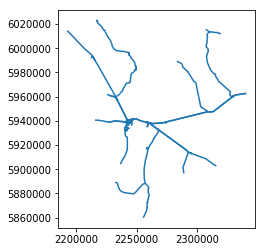

In [45]:
vasut_BAZ_megyeben = megyek['possible_matches'][16]
geometry_BAZ_megye = megyek['geometry'][16]
railways.loc[filter_railways(vasut_BAZ_megyeben, geometry_BAZ_megye)].plot()

Creating the intersections, calculating the lengths in km:

In [46]:
megyek['matches'] = megyek.apply(lambda row: filter_railways(row['possible_matches'],row['geometry']),axis=1)
megyek['lengths']= megyek['matches'].map(lambda m: sum(railways.loc[m].length)/1000)

megyek.sort_values(by='lengths',ascending=False)

,NAME,ADMIN_LEVE,geometry,possible_matches,matches,lengths
12,Budapest,6,"POLYGON ((2106733.129999999 5999808.408854639,...","[1838, 9242, 9247, 9257, 9256, 14336, 11879, 1...","[6788, 2279, 898, 2270, 3070, 3086, 3067, 3084...",2134.531147
13,Pest megye,6,"POLYGON ((2080398.3 6005251.972862312, 2081054...","[7315, 899, 7319, 4459, 4457, 7701, 7702, 9877...","[10333, 10334, 10324, 10330, 9816, 9800, 9799,...",2005.122796
1,Szabolcs-Szatmár-Bereg megye,6,"POLYGON ((2346476.669999999 6075429.715303235,...","[13070, 5934, 5937, 5935, 5936, 5161, 13069, 5...","[11541, 8600, 14742, 11538, 11489, 8432, 8433,...",1608.306941
0,Borsod-Abaúj-Zemplén megye,6,"POLYGON ((2232168.06 6102949.35780532, 2232283...","[13070, 5934, 5937, 5935, 5936, 5161, 13069, 5...","[13070, 5934, 5937, 5935, 5936, 5161, 13069, 5...",1423.233897
18,Hajdú-Bihar megye,6,"POLYGON ((2318133.87 6015693.427666605, 231827...","[7202, 7205, 7206, 7203, 7207, 9339, 7208, 720...","[7392, 3291, 7391, 5341, 5340, 5346, 8699, 869...",1280.448920
9,Bács-Kiskun megye,6,"POLYGON ((2085356.03 5756862.585049815, 208596...","[6306, 5528, 5551, 5545, 5550, 5521, 10604, 10...","[5528, 5551, 5545, 5550, 5521, 10604, 10692, 1...",1276.724489
16,Jász-Nagykun-Szolnok megye,6,"POLYGON ((2187584.19 6002774.732755783, 218803...","[3312, 6584, 6583, 6578, 6577, 9677, 6580, 968...","[11845, 12897, 4481, 4476, 4485, 9944, 9943, 1...",1269.474198
6,Győr-Moson-Sopron megye,6,"POLYGON ((1828036.71 6019752.135601252, 182806...","[5674, 7942, 7979, 5710, 7987, 5699, 5680, 570...","[5674, 7942, 7979, 5710, 7987, 5699, 5680, 570...",1105.936784
10,Fejér megye,6,"POLYGON ((2007560.54 5966363.024893414, 200799...","[5353, 11735, 11736, 10563, 2521, 2737, 2738, ...","[207, 126, 14600, 12089, 14601, 14602, 14603, ...",1060.061156
15,Békés megye,6,"POLYGON ((2271752.939999999 5887983.587844999,...","[11015, 1509, 6190, 1510, 6431, 11901, 6433, 1...","[7165, 8014, 5887, 5892, 5894, 764, 4918, 9378...",920.096720


## Adding shapes to a folium map

In [47]:
import json, folium

We use the same basemap as before, and we retrieve the railways of Budapest from out previous analysis. Then, we reproject the railways to use lon,lat coordinates again, and convert them to GeoJSON, which is then added by folium to the map.

In [48]:
railways.head()

,osm_id,code,fclass,name,geometry
0,4292868,6101,rail,None,LINESTRING (2002714.037937523 5754888.13088570...
1,4293011,6101,rail,None,LINESTRING (2015416.805219485 5786359.63682543...
2,4351791,6101,rail,None,"LINESTRING (2013463.893996652 6035312.0496059,..."
3,4351792,6101,rail,None,LINESTRING (2013395.59948905 6034466.360673053...
4,4418653,6101,rail,None,LINESTRING (2204378.657478714 6091841.30449808...


In [49]:
mymap = folium.Map(location=[47.5,19.05],zoom_start=13,tiles='cartodbpositron')
budapest_railways = railways.loc[megyek['matches'][12]].to_crs({'init':'epsg:4326'})
bpr_geojson = json.loads(budapest_railways.to_json())

In [50]:
budapest_railways.head()

,osm_id,code,fclass,name,geometry
6788,263911968,6104,tram,12,"LINESTRING (19.1132734 47.5702814999832, 19.11..."
2279,95455512,6104,tram,12,"LINESTRING (19.1136936 47.5703232999832, 19.11..."
898,44112149,6104,tram,14,"LINESTRING (19.113421 47.5701962999832, 19.113..."
2270,95352829,6104,tram,14,"LINESTRING (19.1134992 47.57054869998321, 19.1..."
3070,108827585,6101,rail,None,"LINESTRING (19.1137588 47.56970929998321, 19.1..."


In [51]:
bpr_geojson

{'type': 'FeatureCollection',
 'features': [{'id': '6788',
   'type': 'Feature',
   'properties': {'osm_id': '263911968',
    'code': 6104,
    'fclass': 'tram',
    'name': '12'},
   'geometry': {'type': 'LineString',
    'coordinates': [[19.113273399999997, 47.5702814999832],
     [19.11348, 47.57030089998321],
     [19.1136832, 47.57028889998322]]}},
  {'id': '2279',
   'type': 'Feature',
   'properties': {'osm_id': '95455512',
    'code': 6104,
    'fclass': 'tram',
    'name': '12'},
   'geometry': {'type': 'LineString',
    'coordinates': [[19.1136936, 47.5703232999832],
     [19.1134868, 47.5703372999832],
     [19.113271799999996, 47.57031779998321]]}},
  {'id': '898',
   'type': 'Feature',
   'properties': {'osm_id': '44112149',
    'code': 6104,
    'fclass': 'tram',
    'name': '14'},
   'geometry': {'type': 'LineString',
    'coordinates': [[19.113421, 47.5701962999832],
     [19.1135566, 47.57053839998321]]}},
  {'id': '2270',
   'type': 'Feature',
   'properties': {'osm_i

Displaying the results.

In [52]:
folium.GeoJson(bpr_geojson).add_to(mymap)
mymap